In [1]:
import os
import numpy as np
from PIL import Image
import cv2

In [2]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.layers.advanced_activations import ReLU
from keras import optimizers
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import tensorflow as tf

Using TensorFlow backend.


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

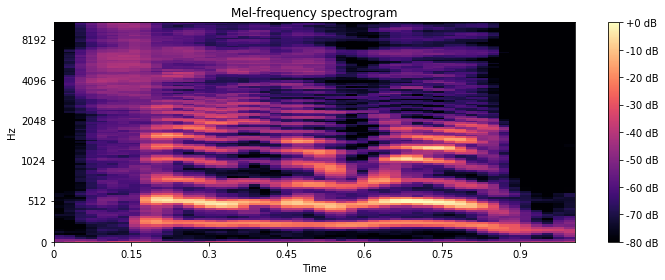

In [4]:
def create_spectrogram(filename):
    plt.figure(figsize=(10, 4))
    clip, sample_rate = librosa.load(filename, sr=None, duration=1)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()

create_spectrogram('output_1/train/angry/OAF_back_angry.wav')

In [5]:
def create_spectrogram(filename):
    clip, sample_rate = librosa.load(filename, sr=None, duration=4)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    S_dB = librosa.power_to_db(S, ref=np.max)
    print(S_dB.shape)
    image = -1*S_dB
    image /= image.max()
    image = cv2.resize(image , dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    return image

In [6]:
train = []
train_labels = []

In [7]:
data_dir = 'output_4'

print('angry...')
for x in os.listdir(data_dir+'/train/angry/') :
    xx = create_spectrogram(data_dir+'/train/angry/'+x)
    train.append(xx)
    train_labels.append(0)

print('sad...')
for x in os.listdir(data_dir+'/train/sad/') :
    xx = create_spectrogram(data_dir+'/train/sad/'+x)
    train.append(xx)
    train_labels.append(1)

print('happy...')
for x in os.listdir(data_dir+'/train/happy/') :
    xx = create_spectrogram(data_dir+'/train/happy/'+x)
    train.append(xx)
    train_labels.append(2)

print('neutral...')
for x in os.listdir(data_dir+'/train/neutral/') :
    xx = create_spectrogram(data_dir+'/train/neutral/'+x)
    train.append(xx)
    train_labels.append(3)

print('disgust...')
for x in os.listdir(data_dir+'/train/disgust/') :
    xx = create_spectrogram(data_dir+'/train/disgust/'+x)
    train.append(xx)
    train_labels.append(4)

print('fear...')
for x in os.listdir(data_dir+'/train/fear/') :
    xx = create_spectrogram(data_dir+'/train/fear/'+x)
    train.append(xx)
    train_labels.append(5)
    
print('surprise...')
for x in os.listdir(data_dir+'/train/surprise/') :
    xx = create_spectrogram(data_dir+'/train/surprise/'+x)
    train.append(xx)
    train_labels.append(6)

angry...
(128, 78)
(128, 74)
(128, 74)
(128, 64)
(128, 78)
(128, 81)
(128, 77)
(128, 77)
(128, 67)
(128, 79)
(128, 81)
(128, 78)
(128, 73)
(128, 75)
(128, 77)
(128, 80)
(128, 69)
(128, 79)
(128, 78)
(128, 75)
(128, 72)
(128, 75)
(128, 77)
(128, 76)
(128, 79)
(128, 81)
(128, 71)
(128, 79)
(128, 73)
(128, 72)
(128, 74)
(128, 81)
(128, 71)
(128, 72)
(128, 65)
(128, 80)
(128, 69)
(128, 75)
(128, 83)
(128, 77)
(128, 79)
(128, 72)
(128, 87)
(128, 80)
(128, 80)
(128, 78)
(128, 81)
(128, 78)
(128, 77)
(128, 83)
(128, 82)
(128, 80)
(128, 77)
(128, 75)
(128, 77)
(128, 78)
(128, 81)
(128, 71)
(128, 75)
(128, 72)
(128, 79)
(128, 70)
(128, 80)
(128, 78)
(128, 76)
(128, 74)
(128, 72)
(128, 74)
(128, 78)
(128, 76)
(128, 81)
(128, 77)
(128, 66)
(128, 71)
(128, 77)
(128, 75)
(128, 72)
(128, 78)
(128, 74)
(128, 77)
(128, 73)
(128, 81)
(128, 83)
(128, 83)
(128, 70)
(128, 80)
(128, 84)
(128, 68)
(128, 72)
(128, 81)
(128, 73)
(128, 80)
(128, 76)
(128, 81)
(128, 76)
(128, 83)
(128, 80)
(128, 69)
(128, 75)
(

(128, 93)
(128, 90)
(128, 103)
(128, 93)
(128, 106)
(128, 96)
(128, 107)
(128, 91)
(128, 107)
(128, 98)
(128, 111)
(128, 101)
(128, 95)
(128, 111)
(128, 100)
(128, 105)
(128, 96)
(128, 93)
(128, 98)
(128, 96)
(128, 96)
(128, 99)
(128, 102)
(128, 107)
(128, 95)
(128, 93)
(128, 95)
(128, 97)
(128, 107)
(128, 101)
(128, 96)
(128, 101)
(128, 98)
(128, 92)
(128, 93)
(128, 93)
(128, 98)
(128, 94)
(128, 96)
(128, 91)
(128, 96)
(128, 95)
(128, 90)
(128, 105)
(128, 92)
(128, 103)
(128, 97)
(128, 87)
(128, 97)
(128, 93)
(128, 91)
(128, 101)
(128, 98)
(128, 98)
(128, 92)
(128, 99)
(128, 97)
(128, 98)
(128, 99)
(128, 113)
(128, 110)
(128, 104)
(128, 99)
(128, 98)
(128, 108)
(128, 109)
(128, 95)
(128, 103)
(128, 99)
(128, 93)
(128, 86)
(128, 95)
(128, 101)
(128, 100)
(128, 104)
(128, 100)
(128, 96)
(128, 94)
(128, 108)
(128, 104)
(128, 91)
(128, 106)
(128, 99)
(128, 98)
(128, 100)
(128, 105)
(128, 95)
(128, 97)
(128, 104)
(128, 101)
(128, 98)
(128, 100)
(128, 101)
(128, 108)
(128, 97)
(128, 101)
(1

(128, 90)
(128, 111)
(128, 92)
(128, 99)
(128, 87)
(128, 93)
(128, 85)
(128, 90)
(128, 109)
(128, 87)
(128, 92)
(128, 84)
(128, 114)
(128, 91)
(128, 87)
(128, 84)
(128, 87)
(128, 83)
(128, 87)
(128, 109)
(128, 91)
(128, 98)
(128, 97)
(128, 111)
(128, 92)
(128, 85)
(128, 86)
(128, 111)
(128, 111)
(128, 92)
(128, 82)
(128, 92)
(128, 106)
(128, 92)
(128, 85)
(128, 108)
(128, 94)
(128, 90)
(128, 90)
(128, 88)
(128, 81)
(128, 89)
(128, 103)
(128, 91)
(128, 81)
(128, 88)
(128, 79)
(128, 89)
(128, 108)
(128, 93)
(128, 90)
(128, 90)
(128, 82)
(128, 87)
(128, 92)
(128, 99)
(128, 106)
(128, 96)
(128, 84)
(128, 112)
(128, 86)
(128, 82)
(128, 89)
(128, 90)
(128, 85)
(128, 97)
(128, 87)
(128, 95)
(128, 97)
(128, 95)
(128, 99)
(128, 87)
(128, 87)
(128, 90)
(128, 92)
(128, 97)
(128, 89)
(128, 114)
(128, 117)
(128, 91)
(128, 106)
(128, 95)
(128, 114)
(128, 95)
(128, 95)
(128, 90)
(128, 112)
(128, 90)
(128, 94)
(128, 107)
(128, 92)
(128, 86)
(128, 82)
(128, 110)
(128, 92)
(128, 90)
(128, 86)
(128, 93)


In [8]:
len(train_labels)

1680

In [9]:
test = []
test_labels = []

In [10]:
data_dir = 'output_4'

print('angry...')
for x in os.listdir(data_dir+'/val/angry/') :
    xx = create_spectrogram(data_dir+'/val/angry/'+x)
    test.append(xx)
    test_labels.append(0)

print('sad...')
for x in os.listdir(data_dir+'/val/sad/') :
    xx = create_spectrogram(data_dir+'/val/sad/'+x)
    test.append(xx)
    test_labels.append(1)

print('happy...')
for x in os.listdir(data_dir+'/val/happy/') :
    xx = create_spectrogram(data_dir+'/val/happy/'+x)
    test.append(xx)
    test_labels.append(2)

print('neutral...')
for x in os.listdir(data_dir+'/val/neutral/') :
    xx = create_spectrogram(data_dir+'/val/neutral/'+x)
    test.append(xx)
    test_labels.append(3)

print('disgust...')
for x in os.listdir(data_dir+'/val/disgust/') :
    xx = create_spectrogram(data_dir+'/val/disgust/'+x)
    test.append(xx)
    test_labels.append(4)

print('fear...')
for x in os.listdir(data_dir+'/val/fear/') :
    xx = create_spectrogram(data_dir+'/val/fear/'+x)
    test.append(xx)
    test_labels.append(5)
    
print('surprise...')
for x in os.listdir(data_dir+'/val/surprise/') :
    xx = create_spectrogram(data_dir+'/val/surprise/'+x)
    test.append(xx)
    test_labels.append(6)

angry...
(128, 74)
(128, 77)
(128, 67)
(128, 69)
(128, 80)
(128, 73)
(128, 69)
(128, 81)
(128, 70)
(128, 72)
(128, 70)
(128, 71)
(128, 70)
(128, 71)
(128, 79)
(128, 74)
(128, 81)
(128, 74)
(128, 69)
(128, 76)
(128, 74)
(128, 76)
(128, 73)
(128, 72)
(128, 81)
(128, 79)
(128, 75)
(128, 77)
(128, 74)
(128, 71)
(128, 77)
(128, 74)
(128, 82)
(128, 75)
(128, 69)
(128, 80)
(128, 72)
(128, 73)
(128, 68)
(128, 78)
(128, 81)
(128, 81)
(128, 78)
(128, 72)
(128, 74)
(128, 73)
(128, 67)
(128, 74)
(128, 73)
(128, 69)
(128, 72)
(128, 76)
(128, 77)
(128, 76)
(128, 73)
(128, 75)
(128, 74)
(128, 89)
(128, 66)
(128, 79)
(128, 81)
(128, 80)
(128, 77)
(128, 67)
(128, 73)
(128, 66)
(128, 70)
(128, 73)
(128, 81)
(128, 77)
(128, 78)
(128, 66)
(128, 72)
(128, 72)
(128, 70)
(128, 76)
(128, 74)
(128, 74)
(128, 76)
(128, 86)
(128, 82)
(128, 77)
(128, 78)
(128, 74)
(128, 76)
(128, 101)
(128, 99)
(128, 107)
(128, 82)
(128, 78)
(128, 104)
(128, 114)
(128, 108)
(128, 105)
(128, 96)
(128, 104)
(128, 98)
(128, 87)
(128

(128, 130)
(128, 123)
(128, 116)
(128, 122)
(128, 129)
(128, 120)
(128, 120)
(128, 124)
(128, 112)
(128, 122)
(128, 117)
(128, 125)
fear...
(128, 83)
(128, 85)
(128, 77)
(128, 63)
(128, 67)
(128, 70)
(128, 67)
(128, 70)
(128, 80)
(128, 70)
(128, 81)
(128, 77)
(128, 76)
(128, 72)
(128, 70)
(128, 86)
(128, 71)
(128, 72)
(128, 76)
(128, 82)
(128, 284)
(128, 75)
(128, 77)
(128, 67)
(128, 88)
(128, 72)
(128, 76)
(128, 67)
(128, 74)
(128, 83)
(128, 73)
(128, 88)
(128, 77)
(128, 80)
(128, 78)
(128, 77)
(128, 70)
(128, 82)
(128, 76)
(128, 70)
(128, 82)
(128, 79)
(128, 81)
(128, 71)
(128, 72)
(128, 75)
(128, 76)
(128, 74)
(128, 68)
(128, 71)
(128, 74)
(128, 75)
(128, 75)
(128, 95)
(128, 78)
(128, 80)
(128, 76)
(128, 75)
(128, 83)
(128, 78)
(128, 91)
(128, 85)
(128, 71)
(128, 79)
(128, 83)
(128, 77)
(128, 77)
(128, 81)
(128, 74)
(128, 79)
(128, 82)
(128, 77)
(128, 79)
(128, 81)
(128, 80)
(128, 86)
(128, 83)
(128, 76)
(128, 97)
(128, 74)
(128, 74)
(128, 82)
(128, 67)
(128, 76)
(128, 84)
(128, 80)

In [11]:
len(test_labels)

1120

In [12]:
model = Sequential([
    Conv2D(30, kernel_size=(11, 11), strides=4, padding='same', activation='relu', input_shape=(256, 256, 1)),#C1
    ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid', data_format=None),
    Conv2D(64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),#C2
    Conv2D(96, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),#C3
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(7, activation='sigmoid')
    # put 6(no. of output)
])

In [13]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
one_hot_labels_train = keras.utils.to_categorical(np.array(train_labels), num_classes=7)
one_hot_labels_test = keras.utils.to_categorical(np.array(test_labels), num_classes=7)

In [15]:
one_hot_labels_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
one_hot_labels_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
print(len(train),len(test))

1680 1120


In [18]:
print(train[500])

[[0.3771207  0.36790428 0.34614295 ... 0.39952707 0.39742282 0.3966648 ]
 [0.42243603 0.41830364 0.4083884  ... 0.4333907  0.42278624 0.41811383]
 [0.49320468 0.49761742 0.5075511  ... 0.48788723 0.4632064  0.45206276]
 ...
 [0.99124    0.9604228  0.8986285  ... 0.9999795  0.99999905 1.        ]
 [0.96266705 0.9359796  0.8845424  ... 0.9999931  0.99999964 1.        ]
 [0.94518447 0.9210237  0.8759145  ... 1.         1.         1.        ]]


Train on 1680 samples, validate on 1120 samples
Epoch 1/20
1680/1680 [==============================] - 10s 6ms/step - loss: 1.9460 - accuracy: 0.1643 - val_loss: 1.9422 - val_accuracy: 0.1455
Epoch 2/20
1680/1680 [==============================] - 5s 3ms/step - loss: 1.9424 - accuracy: 0.1875 - val_loss: 1.9351 - val_accuracy: 0.2455
Epoch 3/20
1680/1680 [==============================] - 5s 3ms/step - loss: 1.9334 - accuracy: 0.1875 - val_loss: 1.9159 - val_accuracy: 0.3214
Epoch 4/20
1680/1680 [==============================] - 5s 3ms/step - loss: 1.9065 - accuracy: 0.2304 - val_loss: 1.8383 - val_accuracy: 0.4652
Epoch 5/20
1680/1680 [==============================] - 5s 3ms/step - loss: 1.7823 - accuracy: 0.3065 - val_loss: 1.5895 - val_accuracy: 0.3438
Epoch 6/20
1680/1680 [==============================] - 5s 3ms/step - loss: 1.4746 - accuracy: 0.4536 - val_loss: 1.0864 - val_accuracy: 0.5884
Epoch 7/20
1680/1680 [==============================] - 5s 3ms/step - loss: 0.9916 - ac

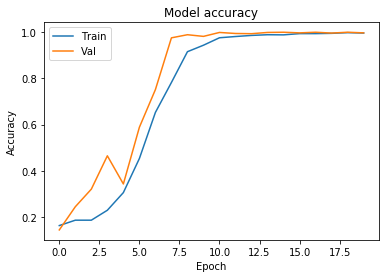

In [19]:
history = model.fit(np.array(train).reshape(len(train),256,256,1),one_hot_labels_train, epochs=20, batch_size=16, validation_data = (np.array(test).reshape(len(test),256,256,1),one_hot_labels_test), shuffle = True)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

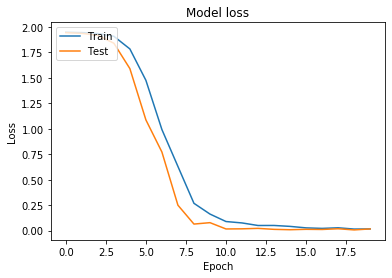

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
len(test)

1120

In [22]:
y_pred = model.predict(np.array(test).reshape(len(test),256,256,1))

In [23]:
np.argmax(y_pred, axis = -1)

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [24]:
np.sum(np.argmax(y_pred, axis = -1) == np.array(test_labels))

1115

In [25]:
tf.math.confusion_matrix(
    np.array(test_labels),
    np.argmax(y_pred, axis = -1),
    num_classes=7,
    weights=None,
    dtype=tf.dtypes.int64,
    name=None
)

<tf.Tensor: id=22616, shape=(7, 7), dtype=int64, numpy=
array([[159,   1,   0,   0,   0,   0,   0],
       [  0, 160,   0,   0,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   1],
       [  0,   0,   0, 160,   0,   0,   0],
       [  0,   2,   0,   0, 158,   0,   0],
       [  0,   0,   0,   1,   0, 159,   0],
       [  0,   0,   0,   0,   0,   0, 160]], dtype=int64)>

In [33]:
1115/1120

0.9955357142857143